In [1]:
import numpy as np
import matplotlib.pyplot as plt

from analysis_utils import *

In [2]:
def plot_tod(data, title=''):
    fig, ax = plt.subplots(figsize = (20, 4))

    ax.plot(data[0], data[1], 'b', label="Y detection")
    ax.plot(data[0], data[2], 'r', label="X detection")
    ax.plot(data[0], data[3], 'g', label="Z detection")

    ax.legend(frameon=False, fontsize=18)
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel('Signal (V)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    return fig, ax

In [3]:
params = {'axes.labelsize': 18,
          'axes.titlesize': 18,
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

## Plot the PSDs

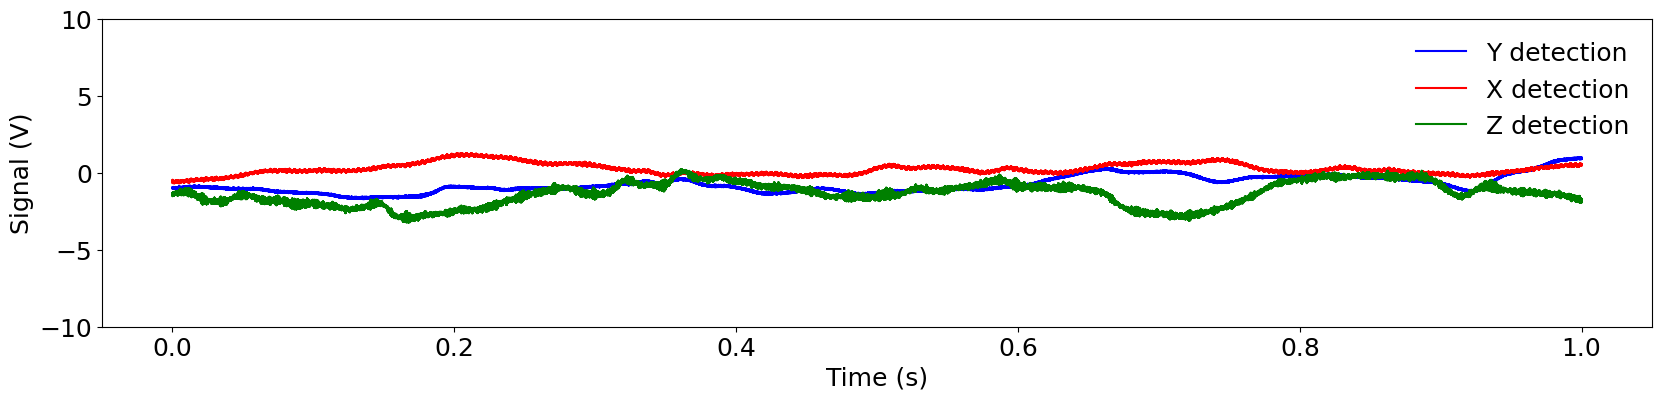

In [11]:
data_file = r"C:\data\timetrace_1s_7_1e-2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plot_tod(data)
ax.set_ylim(-10, 10)
plt.show()

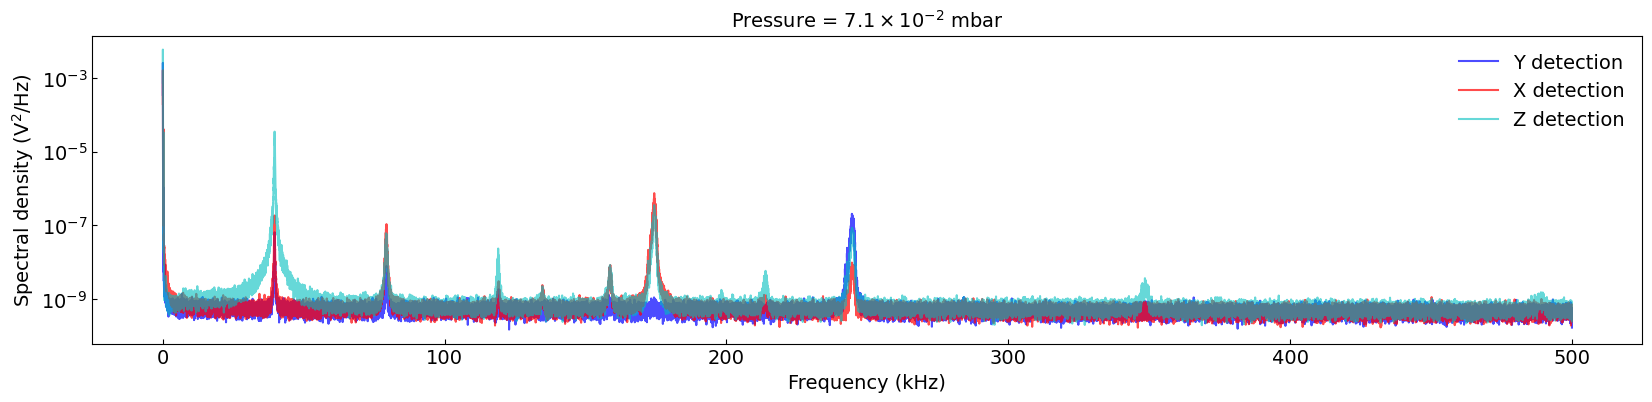

In [16]:
ffy, ppy = get_psd(data, channel=1)
ffx, ppx = get_psd(data, channel=2)
ffz, ppz = get_psd(data, channel=3)

fig, ax = plt.subplots(figsize = (20, 4))
ax.plot(ffy/1000, ppy, 'b', label='Y detection', alpha=0.7)
ax.plot(ffx/1000, ppx, 'r', label='X detection', alpha=0.7)
ax.plot(ffz/1000, ppz, 'c', label='Z detection', alpha=0.6)

ax.set_title(r'Pressure = $7.1 \times 10^{-2}$ mbar', fontsize=14)
ax.set_xlabel('Frequency (kHz)', fontsize=14)
ax.set_ylabel('Spectral density (V$^2$/Hz)', fontsize=14)

ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)

## Long timestream

[]

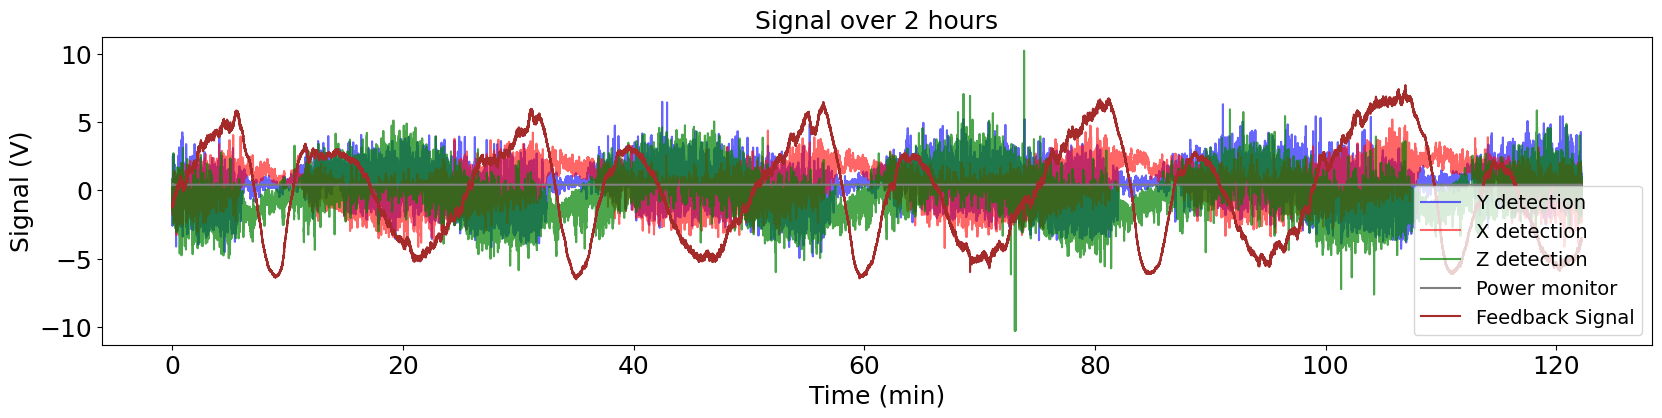

In [21]:
data_file = r"C:\Users\yuhan\Documents\Data\housekeeping\20240201_long_timetrace.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plt.subplots(figsize = (20, 4))

ax.plot(data[0]/60, data[1], 'b', label="Y detection", alpha=0.6)
ax.plot(data[0]/60, data[2], 'r', label="X detection", alpha=0.6)
ax.plot(data[0]/60, data[3], 'g', label="Z detection", alpha=0.7)
ax.plot(data[0]/60, data[4], 'grey', label="Power monitor")
ax.plot(data[0]/60, data[5], 'brown', label="Feedback Signal")

ax.legend(frameon=True, fontsize=14)
ax.set_xlabel('Time (min)', fontsize=18)
ax.set_ylabel('Signal (V)', fontsize=18)
ax.set_title('Signal over 2 hours', fontsize=18)

plt.plot()

## Addendum 20240202: longer timestreams with temperature data

In [4]:
data_file_0 = r"C:\Users\yuhan\Documents\Data\housekeeping\20240202_longer_timetrace_0.csv"
data_file_1 = r"C:\Users\yuhan\Documents\Data\housekeeping\20240202_longer_timetrace_1.csv"
temp_file   = r"C:\Users\yuhan\Documents\Data\housekeeping\room_temp_long.txt"

In [25]:
data_0 = np.genfromtxt(data_file_0, delimiter=',', skip_header=3).T
data_1 = np.genfromtxt(data_file_1, delimiter=',', skip_header=3).T
temp   = np.genfromtxt(temp_file, skip_header=58).T

[]

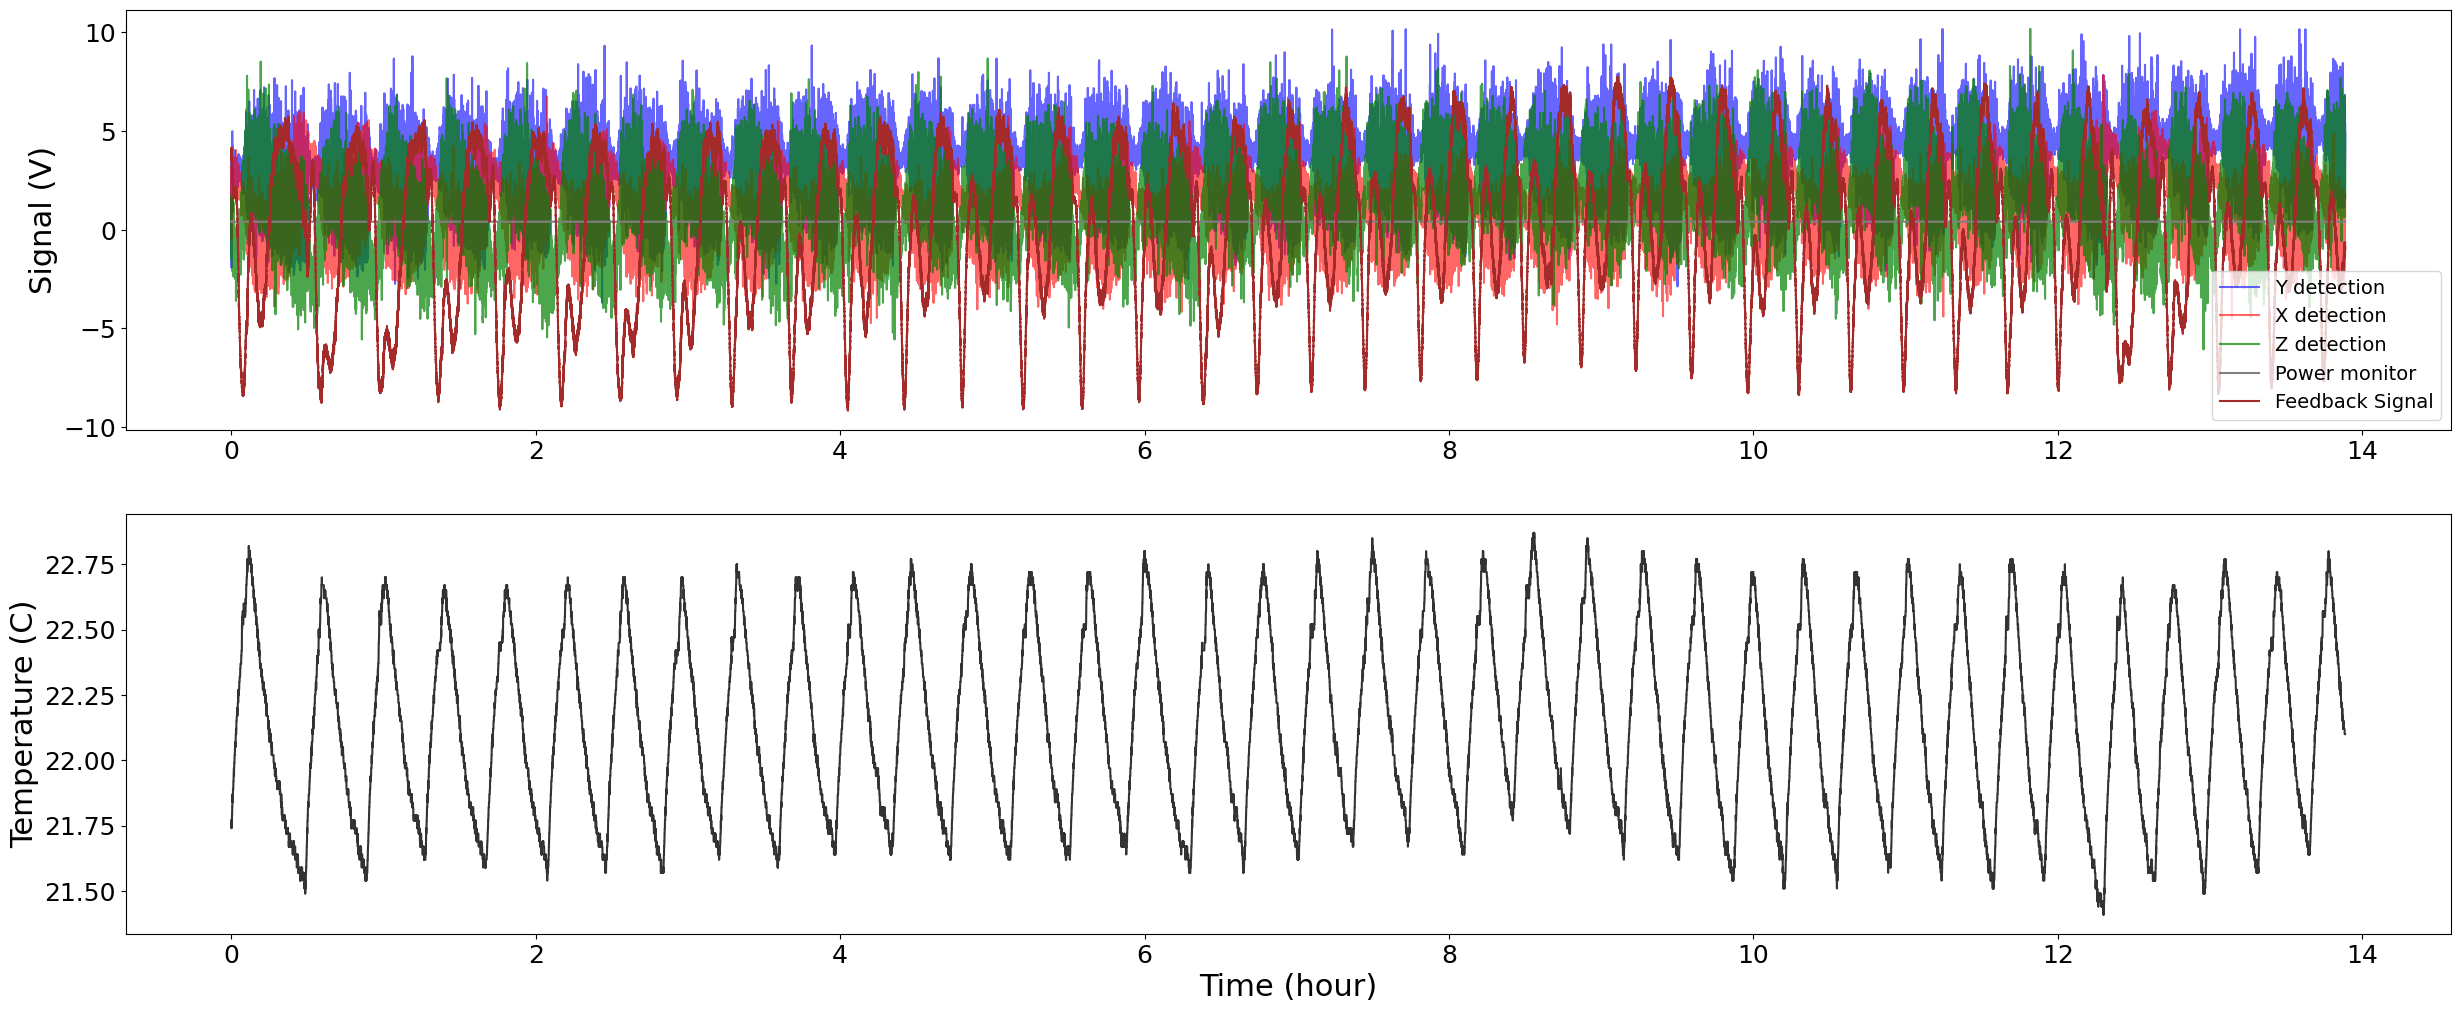

In [41]:
fig, ax = plt.subplots(2, 1, figsize = (30, 12))

ax[0].plot(data_0[0]/3600, data_0[1], 'b', label="Y detection", alpha=0.6)
ax[0].plot(data_0[0]/3600, data_0[2], 'r', label="X detection", alpha=0.6)
ax[0].plot(data_0[0]/3600, data_0[3], 'g', label="Z detection", alpha=0.7)
ax[0].plot(data_0[0]/3600, data_0[4], 'grey', label="Power monitor")
ax[0].plot(data_0[0]/3600, data_0[5], 'brown', label="Feedback Signal")
ax[0].legend(frameon=True, fontsize=14)

good_idx = temp[0] < np.max(data_0[0])
ax[1].plot(temp[0, good_idx]/3600, temp[3, good_idx], 'k', label="Room temperature", alpha=0.8)

ax[0].set_ylabel('Signal (V)', fontsize=22)
ax[1].set_xlabel('Time (hour)', fontsize=22)
ax[1].set_ylabel('Temperature (C)', fontsize=22)

plt.plot()